In [4]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

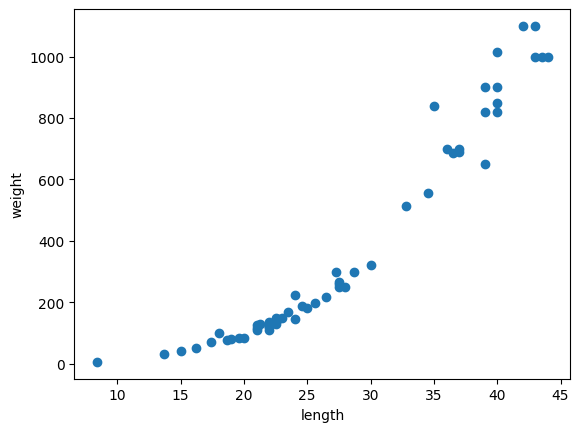

In [5]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


In [11]:
# input 형식에 맞게 2차원으로 reshape
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [12]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target)) # R^2 값 : 1 - (타깃 - 예측)^2/(타깃 - 평균)^2

0.992809406101064


In [13]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 예측이 평균적으로 19g 정도 타깃값과 다르다

19.157142857142862


In [15]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [16]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.9746459963987609


In [25]:
for n_neighbors in range(1, len(train_input)+1,2):
    knr.n_neighbors = n_neighbors
    knr.fit(train_input, train_target)
    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)
    # 과소적합 과대적합 판단
    print(f'{n_neighbors} : {train_score} / {test_score}')
    #print('Overfitting')
    # if train_score / test_score <= 1:
    #   break

print(f'Optimized! : {n_neighbors} : {train_score} / {test_score}')

1 : 0.9852830341215901 / 0.991309195814175
3 : 0.9804899950518966 / 0.9746459963987609
5 : 0.9698823289099254 / 0.992809406101064
7 : 0.9761170732051527 / 0.9781383949643516
9 : 0.9693310367551284 / 0.9692647749722698
11 : 0.9515761381539326 / 0.970279643030474
13 : 0.9413423450130075 / 0.9639044643206888
15 : 0.930201118360776 / 0.9554827691127018
17 : 0.9087778943199959 / 0.9314058693169347
19 : 0.8782082893573573 / 0.900993697623706
21 : 0.8410922229110086 / 0.8596922255009882
23 : 0.7915879473391005 / 0.8146418957364303
25 : 0.7452999142836829 / 0.7667897994036779
27 : 0.6908904295441316 / 0.7131817408006262
29 : 0.6245508306350807 / 0.6429925427310261
31 : 0.5505387544219442 / 0.5653184638150339
33 : 0.4752451966763833 / 0.4834613125728193
35 : 0.39478071361200084 / 0.3957495287182914
37 : 0.28970143088637 / 0.27891888794463027
39 : 0.18151707588188104 / 0.15639071677015748
41 : 0.05978205016667115 / 0.013071066272332454
Optimized! : 41 : 0.05978205016667115 / 0.013071066272332454

In [26]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


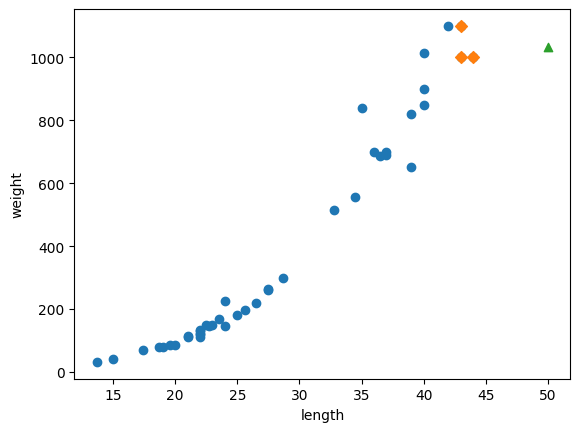

In [27]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

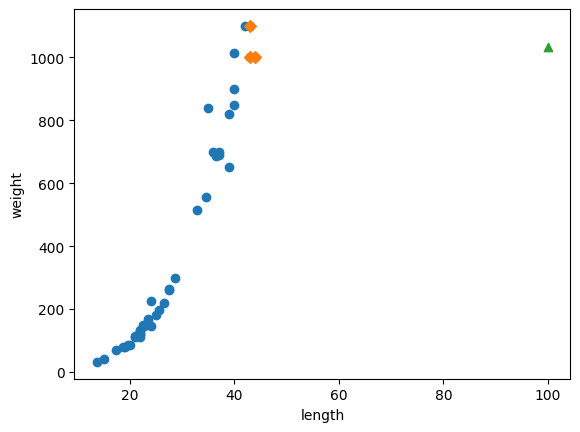

In [28]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


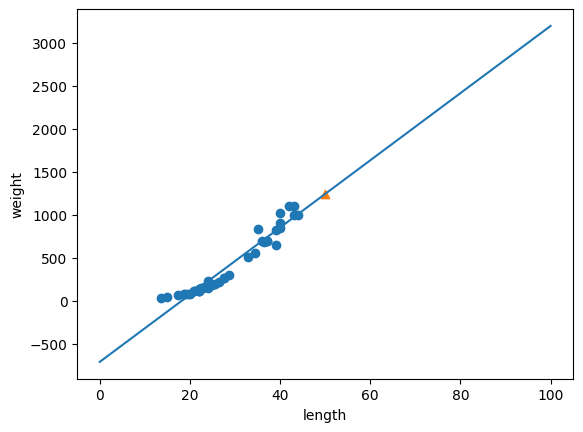

In [38]:
# draw scatter and regression line
plt.scatter(train_input, train_target)
X = np.arange(0,100,0.001)
plt.plot(X, lr.intercept_ + lr.coef_*X)

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 과대적합 or 과소적합? ㄴㄴ 전체적으로 과소적합됨! ㅋㅋㅋ

0.939846333997604
0.8247503123313558


## 다항회귀

In [53]:
train_poly = np.column_stack([train_input ** 2, train_input])
test_poly = np.column_stack([test_input ** 2, test_input])

In [54]:
lr_poly = LinearRegression(fit_intercept=False)

lr_poly.fit(train_poly, train_target)

print(lr_poly.predict([[50**2, 50]]))

[1534.40862672]


In [55]:
print(lr_poly.coef_, lr_poly.intercept_)

[  0.8803629  -13.32997263] 0.0


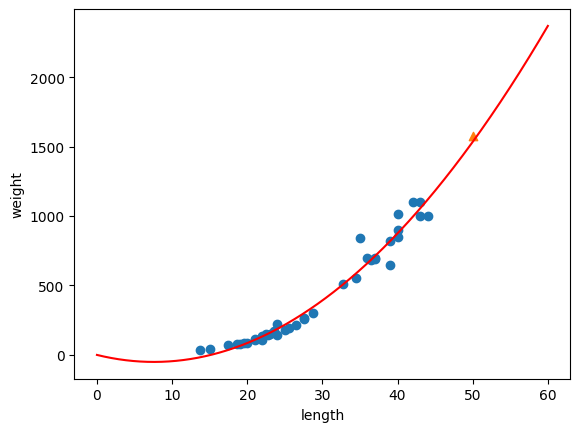

In [56]:
plt.scatter(train_input, train_target)
X = np.arange(0,60,0.001)
plt.plot(X, lr_poly.coef_[0] * X**2 + lr_poly.coef_[1] * X + lr_poly.intercept_, color='r')

plt.scatter(50, 1573.98423528, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1550.40272282]
[ 1.18252010e-03  8.05942714e-01 -1.22453815e+01] 0.0


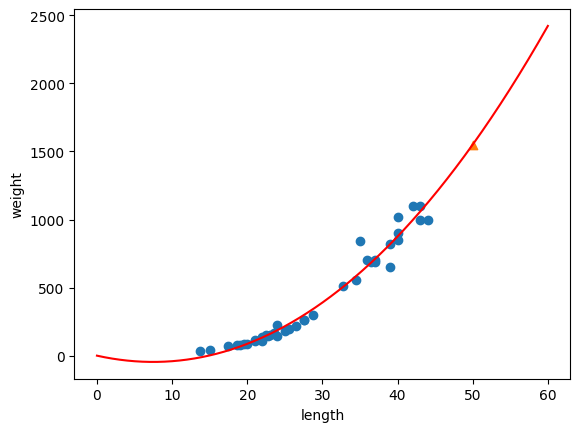

In [57]:
train_poly = np.column_stack([train_input ** 3, train_input ** 2, train_input])
test_poly = np.column_stack([test_input ** 3, test_input ** 2, test_input])

lr_poly = LinearRegression(fit_intercept=False)

lr_poly.fit(train_poly, train_target)

print(lr_poly.predict([[50**3, 50**2, 50]]))

print(lr_poly.coef_, lr_poly.intercept_)

plt.scatter(train_input, train_target)
X = np.arange(0,60,0.001)
plt.plot(X, lr_poly.coef_[0] * X**3 + lr_poly.coef_[1] * X ** 2 + lr_poly.coef_[2] * X + lr_poly.intercept_, color='r')

plt.scatter(50, lr_poly.predict([[50**3, 50**2, 50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()